
*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/


# Part I: Import and Inspect Data

In [308]:
# pip install tweepy
#!python -m pip install textblob
#!python -m textblob.download_corpora


In [309]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from textblob import TextBlob

In [310]:
df = pd.read_csv('https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-prediction-Colden/main/data/Queried_Data/clipped_trump_data_2021.csv')
df.head()

,Tweet_number,rawContent,timestamp,ID,replyCount,retweetCount,likeCount
0,0.0,Excellent idea. Trump can use his foreign emol...,2018-12-31 23:59:45+00:00,1.080000e+18,121.0,450.0,1392.0
1,1.0,There are truly no limits to the hypocrisy of ...,2018-12-31 23:57:38+00:00,1.080000e+18,143.0,1593.0,2640.0
2,2.0,Trump lawyer Giuliani Says Assange Should Not ...,2018-12-31 23:49:47+00:00,1.080000e+18,170.0,1062.0,2230.0
3,3.0,I’d like to take this opportunity to remind ev...,2018-12-31 23:48:46+00:00,1.080000e+18,103.0,260.0,1370.0
4,4.0,"“Mr Trump, do you think Elizabeth Warren could...",2018-12-31 23:37:22+00:00,1.080000e+18,126.0,271.0,1119.0


# Part II: Prepare the Y variable for Regression

In [311]:
#pip install snscrape

In [312]:
#pip install nltk

In [313]:
nltk.download('vader_lexicon')
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [314]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

#applying this function to Text column of our dataframe
df['rawContent'] = df['rawContent'].astype(str)
df["rawContent"] = df["rawContent"].apply(cleanTxt)


In [315]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
tweet_list1 = []
tweet_list2 = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for tweet in df['rawContent']:
    tweet_list1.append(tweet)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(tweet) #appending the tweet that satisfies this condition
        negative += 1 #increasing the count by 1
        tweet_list2.append(1)
    elif pos > neg:
        positive_list.append(tweet) #appending the tweet that satisfies this condition
        positive += 1 #increasing the count by 1
        tweet_list2.append(-1)
    elif pos == neg:
        neutral_list.append(tweet) #appending the tweet that satisfies this condition
        neutral += 1 #increasing the count by 1 
        tweet_list2.append(0)


positive = percentage(positive, len(df)) #percentage is the function defined above
negative = percentage(negative, len(df))
neutral = percentage(neutral, len(df))


In [316]:
print(tweet_list2)

[-1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 0, -1, 1, -1, 1, 1, 0, 1, -1, -1, -1, -1, 0, -1, -1, 1, -1, 1, -1, 0, -1, 0, 1, -1, -1, 0, -1, -1, 0, 0, 1, -1, -1, 0, -1, 0, 1, 1, 1, 1, 0, -1, 0, 1, 1, 1, 1, -1, -1, -1, 1, 0, 1, 1, 1, 1, -1, 1, 0, -1, -1, 1, 1, -1, -1, 1, -1, 1, 0, -1, 1, 1, 0, -1, 1, -1, 0, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 0, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 0, 1, 0, 1, 0, -1, 0, 0, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 0, -1, 1, -1, 1, 1, -1, -1, 0, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 0, -1, -1, 1, 1, 0, 1, 1, 1, -1, 0, -1, 1, 1, 1, -1, 0, 1, -1, 1, 1, -1, 1, -1, 0, -1, 1, 1, 0, 1, 0, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 0, 1, 1, 0, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 0, -1, -1, -1, 0, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 0, 1, 1, 0, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 0, -1, 1, -1, 1, -1, 1, -1, -1, 1, 0, -1, 0, -1, 1, -1, 1, -1,

In [317]:
# add lists back to main dataframe
def add_values_to_dataframe(df, values_list, column_name):
    # create a Series from the list of values
    new_column = pd.Series(values_list)
    # add the new column to the DataFrame
    df[column_name] = new_column
    return df

# call function on df and list to join
df = add_values_to_dataframe(df, tweet_list1, 'Processed_tweet')
df = add_values_to_dataframe(df, tweet_list2, 'Polarization_bool')

In [318]:
# These na values are not an issue -- it was an issue with how excel was imported, not a problem with bad data.
#df.isna().sum()
df =df.dropna()

Positive Sentiment: 372.00
*Neutral Sentiment: 0.00
*Negative Sentiment: 491.00
*

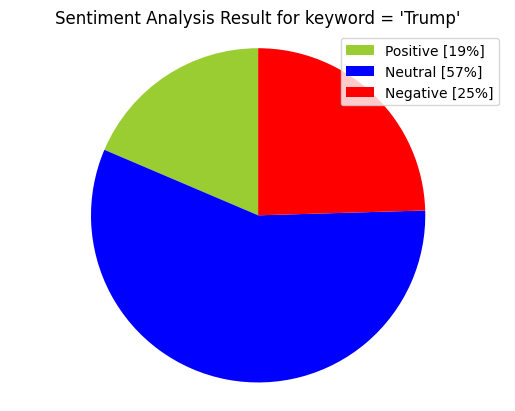

In [349]:
#Converting lists to pandas dataframe
tweet_list1 = pd.DataFrame(tweet_list1)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n*')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n*')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n*')

#Creating PieCart

labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword = 'Trump'" )
plt.axis('equal')
plt.show()



Wordcloud for Trump data Query


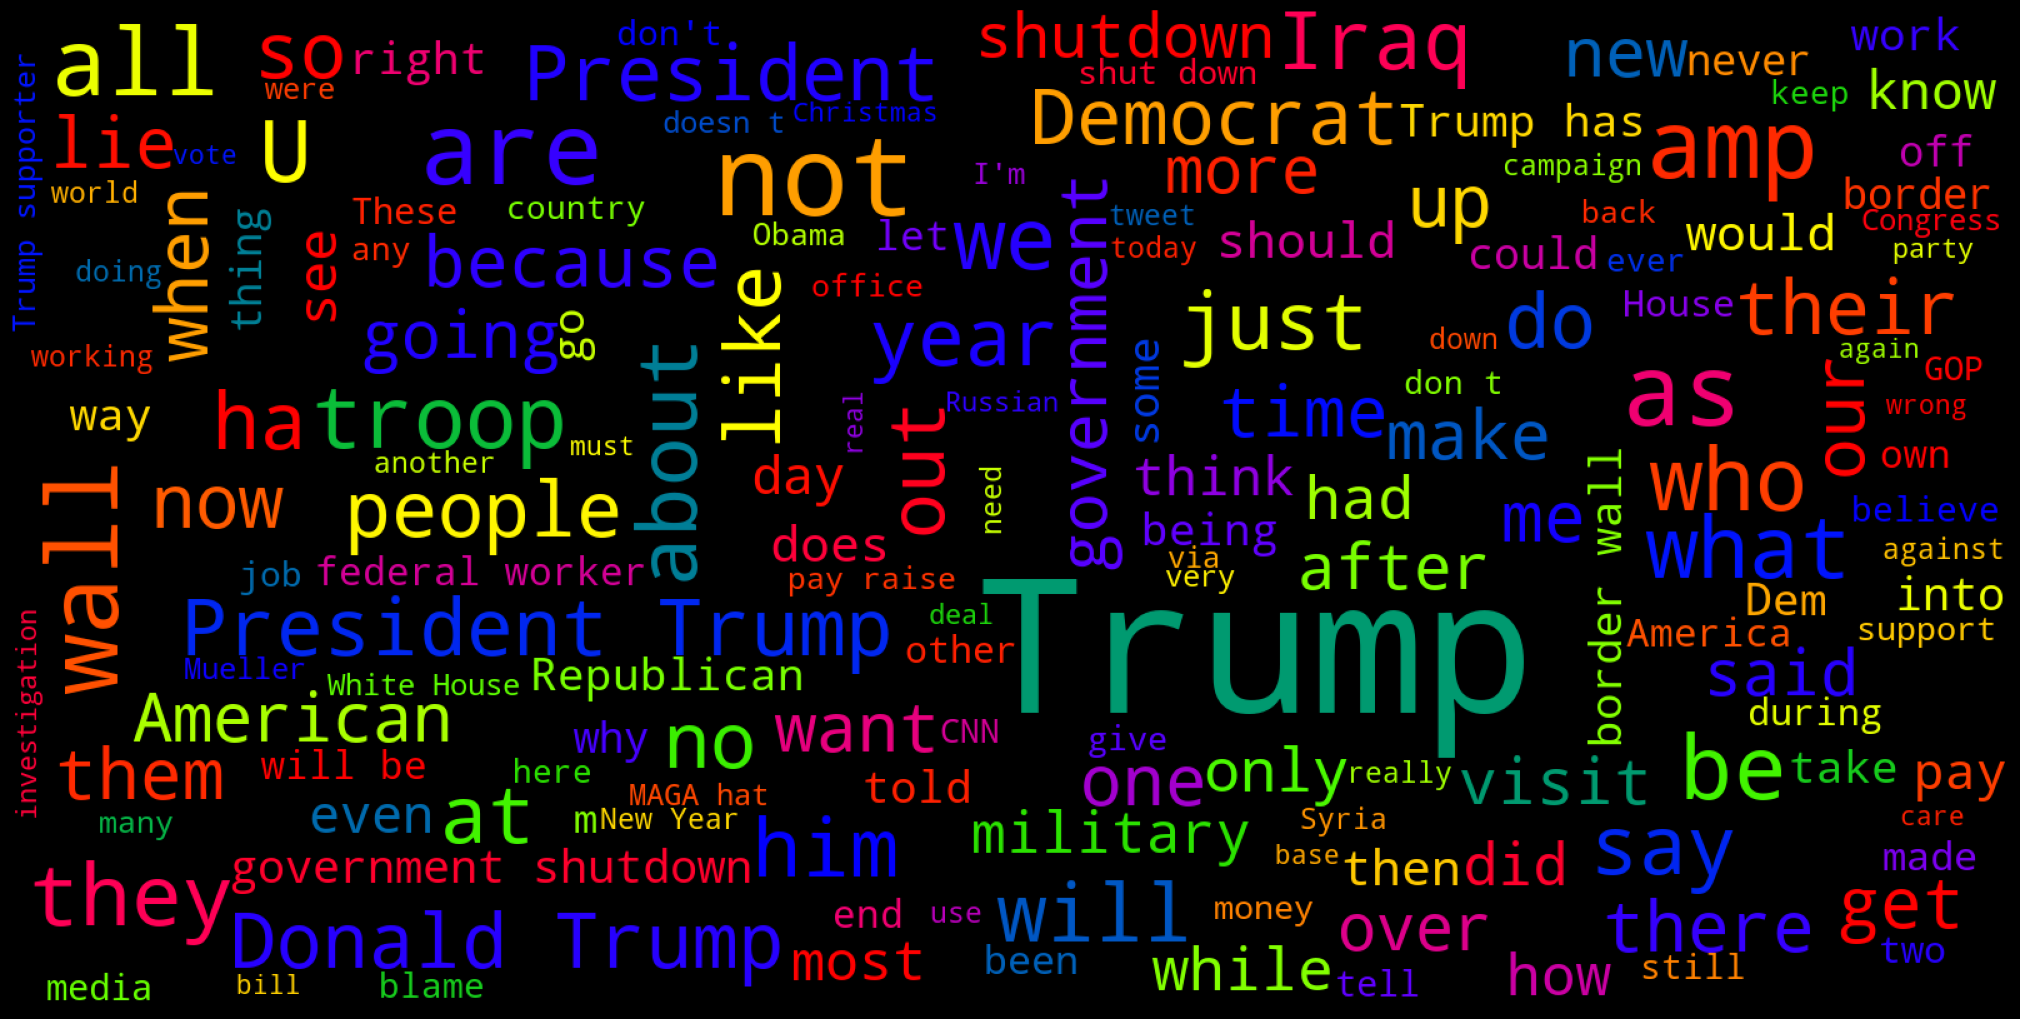

In [320]:
# word cloud visualization
def word_cloud(text):
    stopwords = set(['and', 'or', 'the', 'to', 'from', 'i', 'he', 'if', 'on', 'but', 'that', 'she', 'her', 'a', 'is', 's', 'in', 'of', 'by', 'for', 'with', 'an', 'was', 'can', 'it', 'you', 'your', 'my', 'have', 'this', 'his'])
    allWords = ' '.join([twts for twts in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for Trump data Query')
word_cloud(df['rawContent'].values)


# Part III: Prepare the Y variable for Classification

reference:

https://datatofish.com/if-condition-in-pandas-dataframe/ *italicized text*

In [321]:
#@title Define Tweet Polarization Parameters
cut_upper = 0.15 #@param {type:"number"}

## 3.1. Method 1: If function

## 3.2. Method 2: Lambda function

notes: the best method that I suggest

In [322]:
# df['Polarization_Bool'] = abs(df['Polarization_value']).apply(lambda x: 1 if x>= cut_upper else 0)
# df.head(40)

# Part V Train and Test Split

*reference*:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [323]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [324]:
# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [325]:
for train_idx, test_idx in tss.split(df):
    print("TRAIN:", train_idx, "TEST:", test_idx)

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [326]:
train_idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [327]:
test_idx

array([ 668,  669,  670,  671,  672,  673,  674,  675,  676,  677,  678,
        679,  680,  681,  682,  683,  684,  685,  686,  687,  688,  689,
        690,  691,  692,  693,  694,  695,  696,  697,  698,  699,  700,
        701,  702,  703,  704,  705,  706,  707,  708,  709,  710,  711,
        712,  713,  714,  715,  716,  717,  718,  719,  720,  721,  722,
        723,  724,  725,  726,  727,  728,  729,  730,  731,  732,  733,
        734,  735,  736,  737,  738,  739,  740,  741,  742,  743,  744,
        745,  746,  747,  748,  749,  750,  751,  752,  753,  754,  755,
        756,  757,  758,  759,  760,  761,  762,  763,  764,  765,  766,
        767,  768,  769,  770,  771,  772,  773,  774,  775,  776,  777,
        778,  779,  780,  781,  782,  783,  784,  785,  786,  787,  788,
        789,  790,  791,  792,  793,  794,  795,  796,  797,  798,  799,
        800,  801,  802,  803,  804,  805,  806,  807,  808,  809,  810,
        811,  812,  813,  814,  815,  816,  817,  8

In [328]:
train_df = df.filter(items=train_idx, axis=0)
test_df =  df.filter(items=test_idx, axis=0)

In [329]:
train_df.head()

,Tweet_number,rawContent,timestamp,ID,replyCount,retweetCount,likeCount,Processed_tweet,Polarization_bool
0,0.0,Excellent idea. Trump can use his foreign emol...,2018-12-31 23:59:45+00:00,1.080000e+18,121.0,450.0,1392.0,Excellent idea. Trump can use his foreign emol...,-1
1,1.0,There are truly no limits to the hypocrisy of ...,2018-12-31 23:57:38+00:00,1.080000e+18,143.0,1593.0,2640.0,There are truly no limits to the hypocrisy of ...,-1
2,2.0,Trump lawyer Giuliani Says Assange Should Not ...,2018-12-31 23:49:47+00:00,1.080000e+18,170.0,1062.0,2230.0,Trump lawyer Giuliani Says Assange Should Not ...,-1
3,3.0,I’d like to take this opportunity to remind ev...,2018-12-31 23:48:46+00:00,1.080000e+18,103.0,260.0,1370.0,I’d like to take this opportunity to remind ev...,-1
4,4.0,"“Mr Trump, do you think Elizabeth Warren could...",2018-12-31 23:37:22+00:00,1.080000e+18,126.0,271.0,1119.0,"“Mr Trump, do you think Elizabeth Warren could...",1


In [330]:
test_df.head()

,Tweet_number,rawContent,timestamp,ID,replyCount,retweetCount,likeCount,Processed_tweet,Polarization_bool
668,668.0,The last two sentences of this comment may be ...,2018-12-28 02:38:00+00:00,1.080000e+18,317.0,244.0,1676.0,The last two sentences of this comment may be ...,1
669,669.0,So federal civilian workers (assuming they’re ...,2018-12-28 02:35:16+00:00,1.080000e+18,108.0,1735.0,3641.0,So federal civilian workers (assuming they’re ...,-1
670,670.0,Trump should come out vehemently against the w...,2018-12-28 01:53:40+00:00,1.080000e+18,805.0,1296.0,8013.0,Trump should come out vehemently against the w...,-1
671,671.0,Who cares? Maybe if ur part of the 29 million ...,2018-12-28 01:51:03+00:00,1.080000e+18,135.0,651.0,1755.0,Who cares? Maybe if ur part of the 29 million ...,-1
672,672.0,Trump Administration Suggests Furloughed Worke...,2018-12-28 01:40:54+00:00,1.080000e+18,396.0,1623.0,2151.0,Trump Administration Suggests Furloughed Worke...,-1


# Part VI Prepare the Train and Test Data for Classification and Regression

## 6.1. Classification

### 6.1.1 Define the columns (Y, X) for Classification 

In [331]:
cols_C = ['Polarization_bool','retweetCount']

### 6.1.2 Define the Data Frame of Train and Test Data for Classification

In [332]:
df_C_train = train_df[cols_C]
df_C_test = test_df[cols_C]

### 6.1.3 Export the Train and Test Data for Classification

In [333]:
df_C_train.head()

,Polarization_bool,retweetCount
0,-1,450.0
1,-1,1593.0
2,-1,1062.0
3,-1,260.0
4,1,271.0


In [334]:
df_C_train.to_csv('Classification_Train.csv')

In [335]:
df_C_test.head()

,Polarization_bool,retweetCount
668,1,244.0
669,-1,1735.0
670,-1,1296.0
671,-1,651.0
672,-1,1623.0


In [336]:
df_C_test.to_csv('Classification_Test.csv')

## 6.2 Regression

### 6.2.1. Define the columns (Y, X) for Regression

In [337]:
cols_R = ['Polarization_bool','retweetCount']

### 6.2.2. Define the Data Frame of Train and Test Data for Regression

In [338]:
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]

### 6.2.3. Export the Train and Test Data for Regression

In [339]:
df_R_train.head()

,Polarization_bool,retweetCount
0,-1,450.0
1,-1,1593.0
2,-1,1062.0
3,-1,260.0
4,1,271.0


In [340]:
df_R_train.to_csv('Regression_Train.csv')

In [341]:
df_R_test.head()

,Polarization_bool,retweetCount
668,1,244.0
669,-1,1735.0
670,-1,1296.0
671,-1,651.0
672,-1,1623.0


In [342]:
df_R_test.to_csv('Regression_Test.csv')